 - 1  Общая информация о таблице
   - 1.1  Временные периоды
   - 1.2  Вывод
 - 2  Сводная таблица за 2016 и 2017 год для брендов Acronia и Terralex
 - 3  Сводная таблица для актуального периода (первое полугодие 2018), по кварталам
 - 4  Бренды
   - 4.1  Acronia
     - 4.1.1  Продажи в 2016/2017 гг
       - 4.1.1.1  Топ регионов по продажами Acronia на 100 тыс. населения
       - 4.1.1.2  Топ по процентному отношению продаж 2017 года к 2016
       - 4.1.1.3  Топ по абсолютным цифрам продаж 2017 год
     - 4.1.2  Продажи в 1 и 2 кварталах 2018 г для бренда Acronia
   - 4.2  Terralex
     - 4.2.1  Продажи в 2016/2017 гг
       - 4.2.1.1  Топ регионов по продажами Terralex на 100 тыс. населения
       - 4.2.1.2  Топ по процентному отношению продаж 2017 года к 2016
       - 4.2.1.3  Топ по абсолютным цифрам продаж 2017 год
     - 4.2.2  Продажи в 1 и 2 кварталах 2018 г для бренда Terralex
   - 4.3  Simplonia
 - 5  Вывод

# Анализ данных

In [75]:
!pip install openpyxl
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

excel_file = 'SalesData.xlsx'
engine = 'openpyxl'
plt.rcParams["figure.figsize"] = (15,8)

## Общая информация о таблице

In [76]:
df = pd.read_excel(io=excel_file, engine=engine, sheet_name='Sales data')
df.sample(10, random_state=1456)

,Region,Year,Month,Brand,Sales
2295,Московская обл,2018,Апрель,Simplonia,2321.889967
3185,Саха (Якутия) Респ,2018,Апрель,Acronia,4646.470089
698,Саха (Якутия) Респ,2017,Февраль,Terralex,314.980001
5283,Краснодарский край,2016,Февраль,Acronia,40434.450909
5377,Челябинская обл,2017,Август,Acronia,48948.861280
2978,Астраханская обл,2017,Январь,Terralex,3936.759981
1075,Курганская обл,2017,Февраль,Terralex,660.639997
5600,Ростовская обл,2018,Май,Acronia,93446.672190
4457,Тверская обл,2017,Ноябрь,Acronia,14342.430429
2183,Курская обл,2016,Май,Acronia,2138.850048


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5697 entries, 0 to 5696
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Region  5697 non-null   object 
 1   Year    5697 non-null   int64  
 2   Month   5697 non-null   object 
 3   Brand   5697 non-null   object 
 4   Sales   5697 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 222.7+ KB


Таблица содержит 4 поля и 5697 записей, типы данных соответствуют содержанию. Дата представлена в формате двух колонок, в одной из которох записан год (int), во второй месяц (object).

Добавлю столбец с датой в формате datetime и столбец с кварталом

In [78]:
df['Month'].str.lower()

month_dict = {'Январь':1, 'Февраль':2, 'Март':3, 'Апрель':4, 'Май':5, 'Июнь':6, 'Июль':7,
       'Август':8, 'Сентябрь':9, 'Октябрь':10, 'Ноябрь':11, 'Декабрь':12}

def date_column(row):
    row['date'] = datetime.datetime(row['Year'], month_dict[row['Month']], 1)
    return row

df = df.apply(date_column, axis=1)

df['quarter'] = pd.PeriodIndex(df.date, freq='Q')

In [79]:
print('Количество дубликатов', df.duplicated().sum())
print('Количество пропусков', df.isna().sum())

Количество дубликатов 0
Количество пропусков Region     0
Year       0
Month      0
Brand      0
Sales      0
date       0
quarter    0
dtype: int64


### Временные периоды

Уникальные значения поля даты для 2018 года

In [80]:
a = df.query('Year == 2018')
a['date'].value_counts()

2018-04-01    238
2018-03-01    236
2018-05-01    232
2018-01-01    227
2018-02-01    227
2018-06-01    196
Name: date, dtype: int64

Данные за 2018 год имеются за шесть месяцев с января по июнь

Уникальные значения поля с датой для каждого бренда

In [81]:
a = df.query('Brand == "Acronia"')
print(a['date'].value_counts())
len(a['date'].unique())

2018-03-01    88
2018-02-01    87
2018-01-01    86
2018-05-01    86
2017-11-01    86
2018-04-01    86
2017-08-01    85
2017-12-01    85
2017-07-01    85
2017-01-01    85
2017-02-01    85
2017-04-01    84
2017-05-01    84
2017-09-01    83
2017-06-01    83
2017-10-01    83
2018-06-01    82
2017-03-01    82
2016-06-01    80
2016-12-01    80
2016-03-01    80
2016-09-01    80
2016-04-01    80
2016-11-01    80
2016-08-01    79
2016-07-01    79
2016-10-01    78
2016-02-01    78
2016-01-01    78
2016-05-01    77
Name: date, dtype: int64


30

In [82]:
a = df.query('Brand == "Terralex"')
print(a['date'].value_counts())
len(a['date'].unique())

2018-02-01    87
2018-03-01    87
2018-05-01    87
2017-01-01    86
2017-08-01    86
2017-11-01    86
2018-04-01    86
2018-01-01    86
2017-04-01    86
2017-02-01    86
2017-07-01    85
2017-06-01    85
2017-10-01    85
2017-12-01    84
2017-03-01    84
2017-05-01    84
2017-09-01    83
2016-02-01    82
2018-06-01    82
2016-12-01    81
2016-06-01    81
2016-04-01    81
2016-08-01    80
2016-10-01    80
2016-03-01    80
2016-09-01    80
2016-11-01    80
2016-07-01    80
2016-01-01    79
2016-05-01    79
Name: date, dtype: int64


30

In [83]:
a = df.query('Brand == "Simplonia"')
print(a['date'].value_counts())
len(a['date'].unique())

2018-04-01    66
2017-12-01    63
2018-03-01    61
2018-05-01    59
2018-01-01    55
2018-02-01    53
2017-11-01    50
2017-07-01    49
2017-08-01    47
2017-10-01    44
2017-09-01    44
2017-06-01    35
2018-06-01    32
2017-05-01    28
2017-04-01    22
2017-03-01    17
Name: date, dtype: int64


16

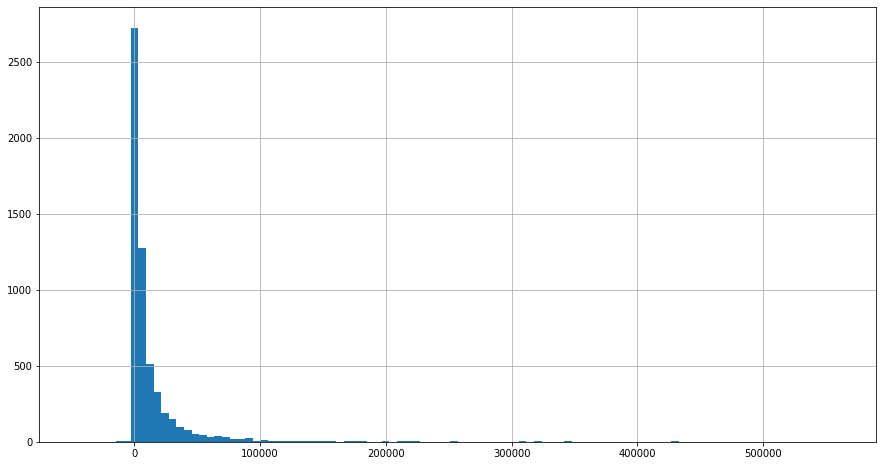

In [84]:
df['Sales'].hist(bins=100)

Распределеные смещено. Есть отрицательные значения продаж.

In [85]:
df['Sales'].describe()

count      5697.000000
mean      12590.131122
std       28978.979014
min      -45237.369446
25%        1030.489985
50%        3462.920090
75%       11905.130335
max      559761.212006
Name: Sales, dtype: float64

Заменю отрицательные значентя продаж на значения по модулю

In [86]:
df.loc[df['Sales'] < 0, 'Sales'] = abs(df['Sales'])

### Вывод
Acronia и Terralex имеют записи с января 2016 года по июнь 2018 (30 месяцев).
Simplonia с марта 2017 по июнь 2018 (16 месяцев).
Следовательно имея такие данные можно сделать сравнение продаж в 2016 и 2017 гг для Acronia и Terralex, 
так же сравнить наиболее актуальный период (1 и 2 квартал 2018г), с аналогичным периодом прошлого года.
Посмотреть динамику продаж и сравнить продажи в регионах для Simplonia. Отрицательные значения продаж заменила на значения по модулю

Добавлю столбец с количеством населения для каждого региона, чтобы в последующем можно было рассчитать количество продаж на 10 тысяч населения и сравнить регионы по этому показателю. Данные по числености регионов получены на сайте - "Федеральная служба государственной статистики", за 2017 г.

In [87]:
population_of_regions_dict ={'Адыгея Респ':453376, 'Алтай Респ':218063, 'Алтайский край':2350080, 'Амурская обл':798424,
       'Архангельская обл':1155020, 'Астраханская обл':1017514, 'Башкортостан Респ':4063293,
       'Белгородская обл':1549876, 'Брянская обл':1210982, 'Бурятия Респ':984511,
       'Владимирская обл':1378337, 'Волгоградская обл':2521276, 'Вологодская обл':1176689,
       'Воронежская обл':2333768, 'Дагестан Респ':3063885, 'Еврейская Аобл':162014,
       'Забайкальский край':1072806, 'Забайкальский край (Агинский Бурятский АО)':76383,
       'Ивановская обл':1014646, 'Ингушетия Респ':488043, 'Иркутская обл':2404195,
       'Иркутская обл (Усть-Ордынский Бурятский АО)':134320,
       'Кабардино-Балкарская Респ':865828, 'Калининградская обл':994599,
       'Калмыкия Респ':275413, 'Калужская обл':1012156, 'Камчатский край':315557,
       'Карачаево-Черкесская Респ':466305, 'Карелия Респ':622484, 'Кемеровская обл':2694877,
       'Кировская обл':1283238, 'Коми Респ':840873, 'Костромская обл':643324,
       'Краснодарский край':5603420, 'Красноярский край':2876497,
       'Красноярский край (Эвенкийский АО) ':16979, 'Курганская обл':845537,
       'Курская обл':1115237, 'Ленинградская обл':1813816, 'Липецкая обл':1150201,
       'Магаданская обл':144091, 'Марий Эл Респ':682333, 'Мордовия Респ':805056, 'Москва г':12506468,
       'Московская обл':7503385, 'Мурманская обл':753557, 'Ненецкий АО':44550,
       'Нижегородская обл':3234752, 'Новгородская обл':606476, 'Новосибирская обл':2788849,
       'Омская обл':1960081, 'Оренбургская обл':1977720, 'Орловская обл':747247,
       'Пензенская обл':1331655, 'Пермский край':2623122,
       'Пермский край (Коми-Пермяцкий АО) ':132824, 'Приморский край':1913037,
       'Псковская обл':636546, 'Ростовская обл':4220452, 'Рязанская обл':1121474,
       'Самарская обл':3193514, 'Санкт-Петербург':5351935, 'Саратовская обл':2462950,
       'Саха (Якутия) Респ':964330, 'Сахалинская обл':490181, 'Свердловская обл':4325256,
       'Северная Осетия - Алания Респ':701765, 'Смоленская обл':949348,
       'Ставропольский край':2800674, 'Таймырский (Долгано-Ненецкий) ':31762,
       'Тамбовская обл':1033552, 'Татарстан Респ':3894284, 'Тверская обл':1283873, 'Томская обл':1078280,
       'Тульская обл':1491855, 'Тыва Респ':321722, 'Тюменская обл':3692400, 'Удмуртская Респ':1513044,
       'Ульяновская обл':1246618, 'Хабаровский край':1328302, 'Хакасия Респ':537513,
       'Ханты-Мансийский АО':1655074, 'Челябинская обл':3493036, 'Чеченская Респ':1436981,
       'Чувашская Респ':1231117, 'Чукотский АО':49348, 'Ямало-Ненецкий АО':538547,
       'Ярославская обл':1265684}

In [88]:
df = df.loc[df['Region'] != 'РФ (БДУ)']

In [89]:
def population_of_regions(row):
    row['population'] =  population_of_regions_dict[row['Region']]
    return row

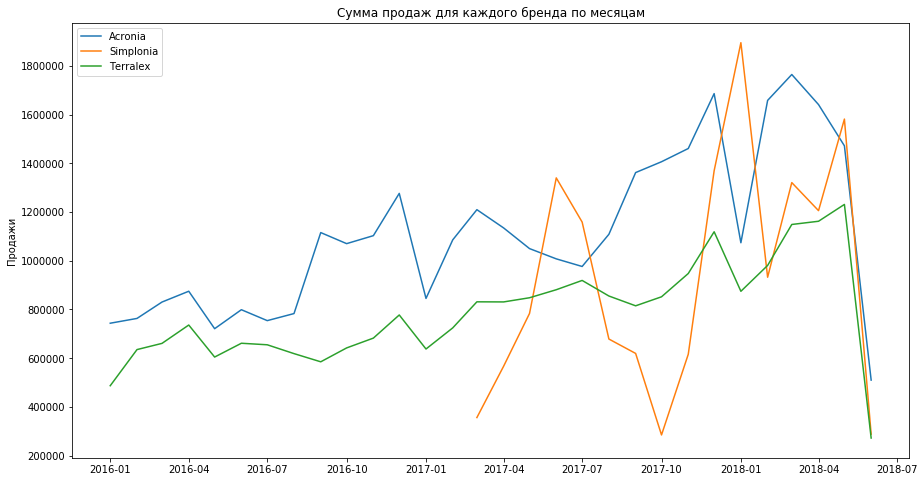

In [90]:
df_piv = df.pivot_table(index=['date'], columns='Brand', values='Sales', aggfunc='sum')

plt.plot(df_piv)
plt.legend(df_piv.columns, loc='upper left')
plt.title('Сумма продаж для каждого бренда по месяцам')
plt.ylabel('Мес.')
plt.ylabel('Продажи')
plt.show()

Судя по графику все три бренда имеют тенденцию к росту. Данные за последний месяц скорее всего неполные. Данные о бренде Simplonia с марта 2017г, возможно, учитывая по стремительный рост, это бренд недвно вышедший на рынок.

## Сводная таблица за 2016 и 2017 год для брендов Acronia и Terralex

Сформирую сводную таблицу по продажам по годам для регионов и брендов.

Таблица будет содержать следующие столбцы:
 - Region - регион
 - Brand - бренд
 - Sales_2016 - суммарные продажи для бренда в регионе за 2016	
 - Sales_2017 - суммарные продажи для бренда в регионе за 2017	
 - sales_per_popul - отношение количества продаж на 100 000 населения	
 - percent_diff_sales_2016_2017 - разница в продажах в процентах в 2016 - 2017гг
 - abs_diff_sales_2016_2017 - абсолютная разница в продажах между 2016 - 2017гг	

In [92]:
df_2017 = df.query('Year == 2017')
df_2016 = df.query('Year == 2016')

In [93]:
def pivot_year(df, year):
    pivot_tab = df.pivot_table(index=['Region', 'Brand'] , values='Sales', aggfunc='sum')
    pivot_tab.columns = ['Sales_'+year]
    pivot_tab.reset_index(inplace=True)
    return pivot_tab

In [94]:
pivot_2017 = pivot_year(df_2017, '2017')
pivot_2016 = pivot_year(df_2016, '2016')

year_tab = pivot_2016.merge(pivot_2017, how='outer', on=['Region', 'Brand'])
year_tab = year_tab.apply(population_of_regions, axis=1)
year_tab[['Sales_2016','Sales_2017']] = round(year_tab[['Sales_2016','Sales_2017']], 1)
year_tab['sales_per_popul'] = round(year_tab['Sales_2017'] * 10**5 / year_tab['population'],1)
year_tab['percent_diff_sales_2016_2017'] = round((year_tab['Sales_2017'] * 100 / year_tab['Sales_2016']) - 100, 1)
year_tab['abs_diff_sales_2016_2017'] = round((year_tab['Sales_2017']  - year_tab['Sales_2016']), 1)
year_tab = year_tab.drop(['population'], axis=1)
year_tab.head(15)

,Region,Brand,Sales_2016,Sales_2017,sales_per_popul,percent_diff_sales_2016_2017,abs_diff_sales_2016_2017
0,Адыгея Респ,Acronia,12991.6,21618.1,4768.2,66.4,8626.5
1,Адыгея Респ,Terralex,22804.1,32375.3,7140.9,42.0,9571.2
2,Алтайский край,Acronia,250620.4,261262.1,11117.2,4.2,10641.7
3,Алтайский край,Terralex,179359.7,258016.5,10979.1,43.9,78656.8
4,Амурская обл,Acronia,13497.8,50959.2,6382.5,277.5,37461.4
5,Амурская обл,Terralex,17285.2,26949.6,3375.3,55.9,9664.4
6,Архангельская обл,Acronia,23571.4,26351.3,2281.5,11.8,2779.9
7,Архангельская обл,Terralex,74363.9,84005.7,7273.1,13.0,9641.8
8,Астраханская обл,Acronia,15783.2,28070.7,2758.8,77.9,12287.5
9,Астраханская обл,Terralex,59091.9,62403.2,6132.9,5.6,3311.3


In [95]:
with pd.ExcelWriter(excel_file, engine=engine, mode='a') as writer: 
    year_tab.to_excel(writer, sheet_name="Pivot Year")

## Сводная таблица для актуального периода (первое полугодие 2018), по кварталам

Сформирую сводную таблицу по продажам по 1 и 2 кварталу 2018 года и аналогичного периода прошлого года для сравнения для регионов и брендов.

Таблица будет содержать следующие столбцы:
 - Region - регион
 - Brand - бренд
 - Sales_2017Q1	 - суммарные продажи для бренда в регионе за 1 кв 2017г	
 - Sales_2017Q2	 - суммарные продажи для бренда в регионе за 2 кв 2017г	
 - Sales_2018Q1	 - суммарные продажи для бренда в регионе за 1 кв 2018г
 - Sales_2018Q2	 - суммарные продажи для бренда в регионе за 2 кв 2018г
 - percent_diff_sales_q1 - разница в продажах в процентах между 1 кв 18 года и 1 кв 17
 - percent_diff_sales_q2 - разница в продажах в процентах между 2 кв 18 года и 2 кв 17

In [96]:
df['quarter'] = df['quarter'].astype(str)

In [97]:
df_1q_2017 = df.query('quarter == "2017Q1"')
df_1q_2018 = df.query('quarter == "2018Q1"')
df_2q_2017 = df.query('quarter == "2017Q2"')
df_2q_2018 = df.query('quarter == "2018Q2"')

In [98]:
def pivot_quarter(df, quarter):
    pivot_tab = df.pivot_table(index=['Region', 'Brand'] , values='Sales', aggfunc='sum')
    pivot_tab.columns = ['Sales_'+quarter]
    pivot_tab.reset_index(inplace=True)
    return pivot_tab

In [99]:
pivot_1q_2017 = pivot_quarter(df_1q_2017, '2017Q1')
pivot_1q_2018 = pivot_quarter(df_1q_2018, '2018Q1')
pivot_2q_2017 = pivot_quarter(df_2q_2017, '2017Q2')
pivot_2q_2018 = pivot_quarter(df_2q_2018, '2018Q2')

quarter_tab = pivot_1q_2017.merge(pivot_2q_2017, how='outer', on=['Region', 'Brand']).merge(pivot_1q_2018, how='outer', on=['Region', 'Brand']).merge(pivot_2q_2018, how='outer', on=['Region', 'Brand'])

quarter_tab[['Sales_2017Q1','Sales_2017Q2', 'Sales_2018Q1', 'Sales_2018Q2']] = round(quarter_tab[['Sales_2017Q1','Sales_2017Q2', 'Sales_2018Q1', 'Sales_2018Q2']], 1)

quarter_tab['percent_diff_sales_q1'] = round((quarter_tab['Sales_2018Q1'] * 100 / quarter_tab['Sales_2017Q1']) - 100, 1)
quarter_tab['percent_diff_sales_q2'] = round((quarter_tab['Sales_2018Q2'] * 100 / quarter_tab['Sales_2017Q2']) - 100, 1)
quarter_tab

,Region,Brand,Sales_2017Q1,Sales_2017Q2,Sales_2018Q1,Sales_2018Q2,percent_diff_sales_q1,percent_diff_sales_q2
0,Адыгея Респ,Acronia,4427.4,4549.5,6340.5,5681.2,43.2,24.9
1,Адыгея Респ,Terralex,7318.0,7986.6,10803.4,8563.1,47.6,7.2
2,Алтай Респ,Acronia,1328.7,1119.7,2345.6,1021.9,76.5,-8.7
3,Алтай Респ,Terralex,243.5,225.5,454.3,207.6,86.6,-7.9
4,Алтайский край,Acronia,56055.7,63547.8,76872.4,50668.2,37.1,-20.3
...,...,...,...,...,...,...,...,...
251,Калининградская обл,Simplonia,NaN,NaN,NaN,404.0,NaN,NaN
252,Карачаево-Черкесская Респ,Simplonia,NaN,NaN,NaN,1836.5,NaN,NaN
253,Костромская обл,Simplonia,NaN,NaN,NaN,23.6,NaN,NaN
254,Курганская обл,Simplonia,NaN,NaN,NaN,73.5,NaN,NaN


In [100]:
with pd.ExcelWriter(excel_file, engine=engine, mode='a') as writer: 
    quarter_tab.to_excel(writer, sheet_name="Pivot Quarter")

## Бренды

### Acronia

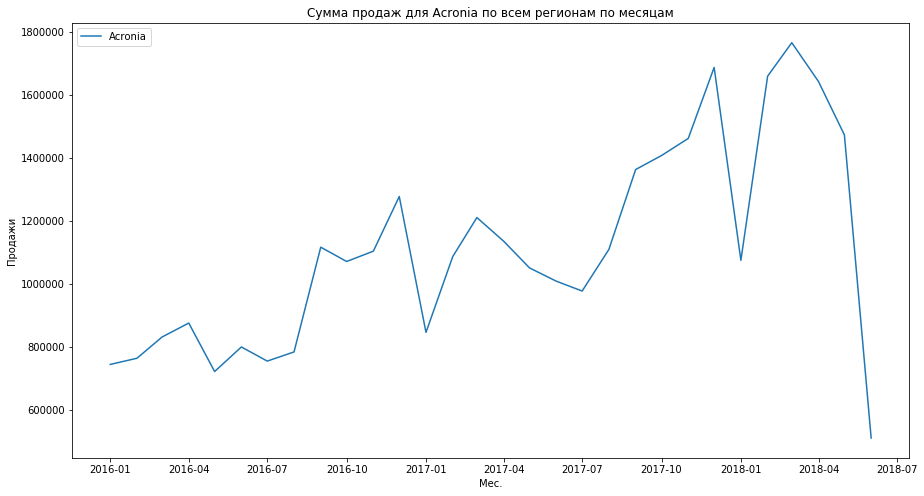

In [101]:
df_piv = df.query('Brand == "Acronia"').reset_index(drop=True).pivot_table(index=['date'], columns='Brand', values='Sales', aggfunc='sum')

plt.plot(df_piv)
plt.legend(df_piv.columns, loc='upper left')
plt.title('Сумма продаж для Acronia по всем регионам по месяцам')
plt.xlabel('Мес.')
plt.ylabel('Продажи')
plt.show()

#### Продажи в 2016/2017 гг

Посмотрю для бренда Acronia по всем полям: 
- количество записей
- среднее
- стандартное отклонение
- минимум
- 0.25 квантиль (граница нижней четверти значений)
- 0.5 квантиль (медиана)
- 0.75 квантиль (граница отделяющая верхнюю четверть значений)
- максимум


In [102]:
acronia = year_tab.query('Brand == "Acronia"').reset_index(drop=True)

acronia.describe()

,Sales_2016,Sales_2017,sales_per_popul,percent_diff_sales_2016_2017,abs_diff_sales_2016_2017
count,8.100000e+01,8.800000e+01,88.000000,81.000000,81.000000
mean,1.337842e+05,1.629292e+05,6085.614773,68.764198,43094.485185
std,2.951326e+05,3.452039e+05,5582.010130,79.278059,73283.304608
min,1.358000e+02,7.850000e+01,87.800000,-10.200000,-2334.000000
25%,1.349780e+04,1.590977e+04,1943.450000,17.800000,5456.200000
50%,2.697830e+04,4.519600e+04,4374.250000,48.600000,15609.000000
75%,1.337268e+05,1.520077e+05,8366.500000,79.800000,43985.100000
max,2.273239e+06,2.678159e+06,23069.000000,378.300000,404920.000000


В 2017 году в среднем продажи выросли относительно 2016 на 68.7% (48.6% медиана). Большое стандартное отклонение говорит о том, что при анализе отдельных регионов, следует опираться на медиану, в не среднее.

С помощью следующей функции закрашу фон ячеек с показателями лучшей(более 0.75 квантиля) и худшей(менее 0.25 квантиля) динамики по полю с процентным отношением продаж 2016/2017 'percent_diff_sal_2016_2017', суммой продаж за 2017 и продажами в расчете на долю населения. Зеленый - лучшие, розовый - худшие.

In [103]:
green = []
red = []

def get_colors_2(df_brand, c1, c2):
    c1_75q = df_brand[c1].quantile(0.75)
    c1_25q = df_brand[c1].quantile(0.25)
    c2_75q = df_brand[c2].quantile(0.75)
    c2_25q = df_brand[c2].quantile(0.25)
    
    green.extend(df_brand.loc[df_brand[c1] > c1_75q][c1])
    red.extend(df_brand.loc[df_brand[c1] < c1_25q][c1])
    green.extend(df_brand.loc[df_brand[c2] > c2_75q][c2])
    red.extend(df_brand.loc[df_brand[c2] < c2_25q][c2])
    
def get_colors_3(df_brand, c1, c2, c3):
    c1_75q = df_brand[c1].quantile(0.75)
    c1_25q = df_brand[c1].quantile(0.25)
    c2_75q = df_brand[c2].quantile(0.75)
    c2_25q = df_brand[c2].quantile(0.25)
    c3_75q = df_brand[c3].quantile(0.75)
    c3_25q = df_brand[c3].quantile(0.25)
    
    green.extend(df_brand.loc[df_brand[c1] > c1_75q][c1])
    red.extend(df_brand.loc[df_brand[c1] < c1_25q][c1])
    green.extend(df_brand.loc[df_brand[c2] > c2_75q][c2])
    red.extend(df_brand.loc[df_brand[c2] < c2_25q][c2])
    green.extend(df_brand.loc[df_brand[c3] > c3_75q][c3])
    red.extend(df_brand.loc[df_brand[c3] < c3_25q][c3])

def get_colors_4(df_brand, c1, c2, c3, c4):
    c1_75q = df_brand[c1].quantile(0.75)
    c1_25q = df_brand[c1].quantile(0.25)
    c2_75q = df_brand[c2].quantile(0.75)
    c2_25q = df_brand[c2].quantile(0.25)
    c3_75q = df_brand[c3].quantile(0.75)
    c3_25q = df_brand[c3].quantile(0.25)
    c4_75q = df_brand[c4].quantile(0.75)
    c4_25q = df_brand[c4].quantile(0.25)
    #print(c2_75q, c2_25q)
    green.extend(df_brand.loc[df_brand[c1] > c1_75q][c1])
    red.extend(df_brand.loc[df_brand[c1] < c1_25q][c1])
    green.extend(df_brand.loc[df_brand[c2] > c2_75q][c2])
    red.extend(df_brand.loc[df_brand[c2] < c2_25q][c2])
    green.extend(df_brand.loc[df_brand[c3] > c3_75q][c3])
    red.extend(df_brand.loc[df_brand[c3] < c3_25q][c3])
    green.extend(df_brand.loc[df_brand[c4] > c4_75q][c4])
    red.extend(df_brand.loc[df_brand[c4] < c4_25q][c4])


def coloring(val):    
    if val in green:
        return "background-color: lightgreen"
    if val in red:
        return "background-color: pink"


In [156]:
acronia_styler = get_colors_3(acronia, 'Sales_2017', 'sales_per_popul', 'percent_diff_sales_2016_2017')
acronia_styler = acronia.style.applymap(coloring, subset=['Sales_2017', 'sales_per_popul', 'percent_diff_sales_2016_2017'])

![AcroniaYear](https://github.com/olga-abrams/DS_projects/blob/main/pharm/img/AcroniaYear.PNG)

In [113]:
with pd.ExcelWriter(excel_file, engine=engine, mode='a') as writer: 
    acronia_styler.to_excel(writer, sheet_name="Acronia Year")

##### Топ регионов по продажами Acronia на 100 тыс. населения

10 регионов с наибольшими продажами в расчете на 100 тыс населения:

,Region,Brand,Sales_2016,Sales_2017,sales_per_popul,percent_diff_sales_2016_2017,abs_diff_sales_2016_2017
0,Ростовская обл,Acronia,880742.5,973616.4,23069.0,10.5,92873.9
1,Воронежская обл,Acronia,260224.8,528340.6,22639.0,103.0,268115.8
2,Москва г,Acronia,2273239.2,2678159.2,21414.2,17.8,404920.0
3,Приморский край,Acronia,179111.9,387198.4,20240.0,116.2,208086.5
4,Свердловская обл,Acronia,706512.2,809551.4,18716.8,14.6,103039.2
5,Нижегородская обл,Acronia,416948.8,604320.7,18682.1,44.9,187371.9
6,Санкт-Петербург,Acronia,605807.4,841788.9,15728.7,39.0,235981.5
7,Краснодарский край,Acronia,579911.4,861811.7,15380.1,48.6,281900.3
8,Челябинская обл,Acronia,347419.3,524119.5,15004.7,50.9,176700.2
9,Иркутская обл,Acronia,269883.7,338837.8,14093.6,25.5,68954.1


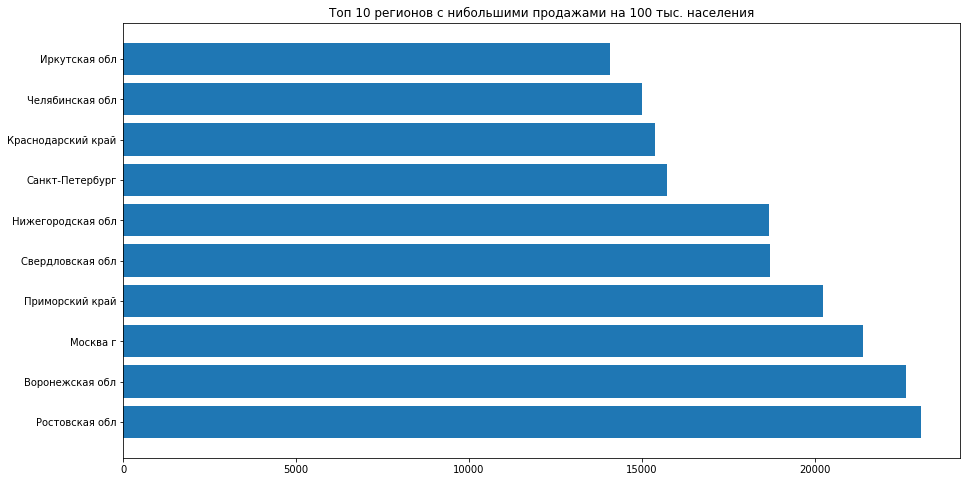

In [114]:
acronia_top = acronia.sort_values(by = 'sales_per_popul', ascending = False).reset_index(drop=True).loc[:9]
plt.rcParams["figure.figsize"] = (15,8)
plt.barh(acronia_top['Region'], acronia_top['sales_per_popul'])
plt.title('Топ 10 регионов с нибольшими продажами на 100 тыс. населения')
acronia_top

20 регионов с нименьшими продажами в расчете на 100 тыс населения:

In [115]:
acronia_antitop = acronia.sort_values(by = 'sales_per_popul', ascending = False).reset_index(drop=True).tail(20)
acronia_antitop.head(10)

,Region,Brand,Sales_2016,Sales_2017,sales_per_popul,percent_diff_sales_2016_2017,abs_diff_sales_2016_2017
68,Северная Осетия - Алания Респ,Acronia,14038.8,12602.2,1795.8,-10.2,-1436.6
69,Ленинградская обл,Acronia,21704.0,32342.6,1783.1,49.0,10638.6
70,Тульская обл,Acronia,25353.2,26328.8,1764.8,3.8,975.6
71,Мурманская обл,Acronia,4413.5,13116.8,1740.7,197.2,8703.3
72,Дагестан Респ,Acronia,16019.3,52391.1,1710.0,227.0,36371.8
73,Калининградская обл,Acronia,11035.3,16491.5,1658.1,49.4,5456.2
74,Псковская обл,Acronia,4882.8,8987.6,1411.9,84.1,4104.8
75,Новгородская обл,Acronia,6627.1,7894.9,1301.8,19.1,1267.8
76,Карачаево-Черкесская Респ,Acronia,2774.9,6055.6,1298.6,118.2,3280.7
77,Кабардино-Балкарская Респ,Acronia,11219.4,10845.9,1252.7,-3.3,-373.5


В антитоп регионов по продажам на душу населения попали в том числе такие крупные регионы, как Ленинградская обл, Новгородская обл, Тамбовская обл, Брянская обл, Тульская обл, Чеченская Респ, Дагестан (более 3 млн населения). Население всех этих субъектов РФ более миллиона человек.

##### Топ по процентному отношению продаж 2017 года к 2016

,Region,Brand,Sales_2016,Sales_2017,sales_per_popul,percent_diff_sales_2016_2017,abs_diff_sales_2016_2017
0,Чувашская Респ,Acronia,5060.1,24201.1,1965.8,378.3,19141.0
1,Еврейская Аобл,Acronia,135.8,582.4,359.5,328.9,446.6
2,Владимирская обл,Acronia,15823.1,62895.4,4563.1,297.5,47072.3
3,Амурская обл,Acronia,13497.8,50959.2,6382.5,277.5,37461.4
4,Дагестан Респ,Acronia,16019.3,52391.1,1710.0,227.0,36371.8
5,Курганская обл,Acronia,2998.2,9223.4,1090.8,207.6,6225.2
6,Костромская обл,Acronia,4399.2,13166.4,2046.6,199.3,8767.2
7,Мурманская обл,Acronia,4413.5,13116.8,1740.7,197.2,8703.3
8,Магаданская обл,Acronia,6735.8,19203.0,13327.0,185.1,12467.2
9,Тыва Респ,Acronia,670.0,1810.1,562.6,170.2,1140.1


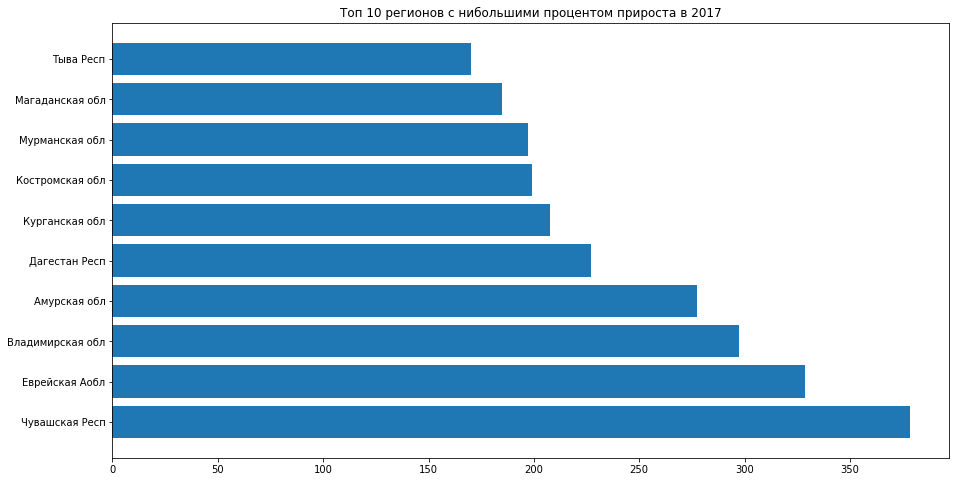

In [116]:
acronia_top1 = acronia.sort_values(by = 'percent_diff_sales_2016_2017', ascending = False).reset_index(drop=True).loc[:9]
plt.barh(acronia_top1['Region'], acronia_top1['percent_diff_sales_2016_2017'])
plt.title('Топ 10 регионов с нибольшими процентом прироста в 2017')
acronia_top1

Регионы с самым низким процентом прироста продаж в 2017г, а так же регионы данные о продажах в 2016 отсутвуют:

In [117]:
acronia_antitop1 = acronia.sort_values(by = 'percent_diff_sales_2016_2017', ascending = False).reset_index(drop=True).tail(20)
acronia_antitop1.head(10)

,Region,Brand,Sales_2016,Sales_2017,sales_per_popul,percent_diff_sales_2016_2017,abs_diff_sales_2016_2017
68,Архангельская обл,Acronia,23571.4,26351.3,2281.5,11.8,2779.9
69,Ростовская обл,Acronia,880742.5,973616.4,23069.0,10.5,92873.9
70,Чеченская Респ,Acronia,1207.9,1262.3,87.8,4.5,54.4
71,Алтайский край,Acronia,250620.4,261262.1,11117.2,4.2,10641.7
72,Тульская обл,Acronia,25353.2,26328.8,1764.8,3.8,975.6
73,Калмыкия Респ,Acronia,6761.3,6941.9,2520.5,2.7,180.6
74,Рязанская обл,Acronia,88093.3,90210.0,8043.9,2.4,2116.7
75,Ярославская обл,Acronia,71940.9,73112.0,5776.5,1.6,1171.1
76,Бурятия Респ,Acronia,20720.1,20975.5,2130.6,1.2,255.4
77,Сахалинская обл,Acronia,31811.4,31095.2,6343.6,-2.3,-716.2


##### Топ по абсолютным цифрам продаж 2017 год

,Region,Brand,Sales_2016,Sales_2017,sales_per_popul,percent_diff_sales_2016_2017,abs_diff_sales_2016_2017
0,Москва г,Acronia,2273239.2,2678159.2,21414.2,17.8,404920.0
1,Ростовская обл,Acronia,880742.5,973616.4,23069.0,10.5,92873.9
2,Краснодарский край,Acronia,579911.4,861811.7,15380.1,48.6,281900.3
3,Санкт-Петербург,Acronia,605807.4,841788.9,15728.7,39.0,235981.5
4,Свердловская обл,Acronia,706512.2,809551.4,18716.8,14.6,103039.2
5,Московская обл,Acronia,488503.3,645602.5,8604.1,32.2,157099.2
6,Нижегородская обл,Acronia,416948.8,604320.7,18682.1,44.9,187371.9
7,Воронежская обл,Acronia,260224.8,528340.6,22639.0,103.0,268115.8
8,Челябинская обл,Acronia,347419.3,524119.5,15004.7,50.9,176700.2
9,Приморский край,Acronia,179111.9,387198.4,20240.0,116.2,208086.5


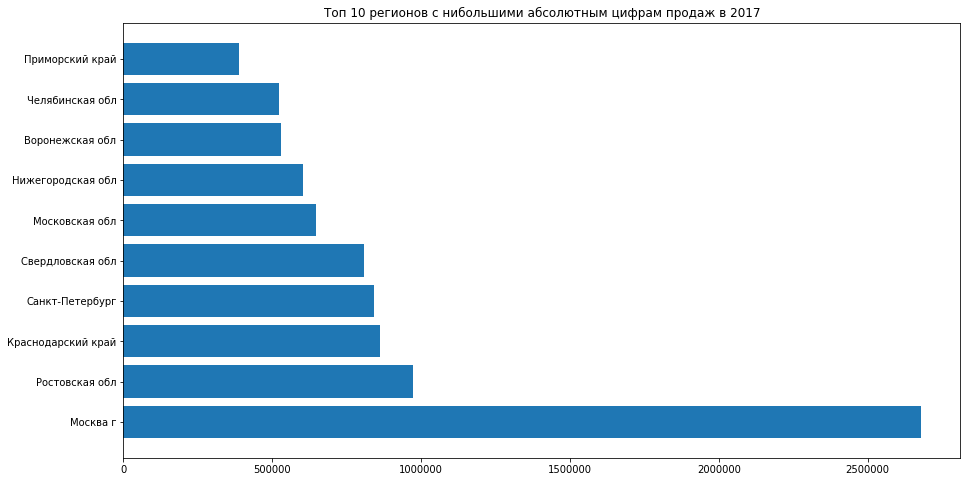

In [118]:
acronia_top2 = acronia.sort_values(by = 'Sales_2017', ascending = False).reset_index(drop=True).loc[:9]
plt.barh(acronia_top2['Region'], acronia_top2['Sales_2017'])
plt.title('Топ 10 регионов с нибольшими абсолютным цифрам продаж в 2017')
acronia_top2

#### Продажи в 1 и 2 кварталах 2018 г для бренда Acronia

In [119]:
acronia_2018 = quarter_tab.query('Brand == "Acronia"').reset_index(drop=True)
acronia_2018.describe()

,Sales_2017Q1,Sales_2017Q2,Sales_2018Q1,Sales_2018Q2,percent_diff_sales_q1,percent_diff_sales_q2
count,87.000000,87.000000,88.000000,87.000000,87.000000,86.000000
mean,36108.860920,36701.913793,51119.804545,41655.477011,96.443678,55.681395
std,78159.905821,78411.575684,107289.288667,96243.680930,112.467919,206.717875
min,39.200000,19.600000,73.200000,23.100000,-80.400000,-91.500000
25%,3452.050000,3486.150000,6249.600000,4451.950000,36.000000,-12.575000
50%,8202.800000,9102.100000,14568.500000,11850.200000,67.700000,9.600000
75%,33479.900000,31442.000000,44462.300000,40716.550000,119.750000,51.375000
max,597819.600000,625042.900000,844792.600000,794655.500000,715.500000,1639.800000


В первом квартале 2018 года продажи показывают значительный рост относительно аналогичного периода 2017 г (медианное значение 68%), во втором квартале рост замедлился (9.6%). Второй квартал 2018 года показывает отрицательную динамику относительно первого квартала того же года, хотя в отношени того же периода 2017 есть небольшой рост.
Данные за июнь неполные это искажает статистику за второй квартал. 

Pаскрашу фон ячеек с показателями лежащими в верхней четверти(более 0.75 квантиля) и нижней четверти(менее 0.25 квантиля) значений

In [158]:
green = []
red = []

get_colors_4(acronia_2018, 'Sales_2018Q2', 'Sales_2018Q1', 'percent_diff_sales_q1', 'percent_diff_sales_q2')
acronia_2018_styler = acronia_2018.style.applymap(coloring, subset=['Sales_2018Q2', 'Sales_2018Q1', 'percent_diff_sales_q1', 'percent_diff_sales_q2'])

![AcroniaQuarter](https://github.com/olga-abrams/DS_projects/blob/main/pharm/img/AcroniaQuarter.PNG)

In [121]:
with pd.ExcelWriter(excel_file, engine=engine, mode='a') as writer: 
    acronia_2018_styler.to_excel(writer, sheet_name="Acronia Quarter")

Топ 10 регионов с лучшим приростом продаж в первом квартале 2018 года по сравнению с аналогичным периодом 2017

,Region,Brand,Sales_2017Q1,Sales_2017Q2,Sales_2018Q1,Sales_2018Q2,percent_diff_sales_q1,percent_diff_sales_q2
0,Забайкальский край (Агинский Бурятский АО),Acronia,53.6,271.6,437.1,93.6,715.5,-65.5
1,Тыва Респ,Acronia,258.8,283.7,1539.3,1609.7,494.8,467.4
2,Пермский край (Коми-Пермяцкий АО),Acronia,58.9,283.7,310.6,67.9,427.3,-76.1
3,Хакасия Респ,Acronia,1989.6,3566.5,8496.5,5026.6,327.0,40.9
4,Чувашская Респ,Acronia,3731.6,3942.8,13609.2,12987.0,264.7,229.4
5,Чукотский АО,Acronia,67.9,271.6,237.7,23.1,250.1,-91.5
6,Магаданская обл,Acronia,4637.0,3102.4,16178.0,3348.7,248.9,7.9
7,Мурманская обл,Acronia,2138.9,2862.4,7224.2,9296.9,237.8,224.8
8,Ульяновская обл,Acronia,6737.2,7767.1,20433.7,18552.7,203.3,138.9
9,Костромская обл,Acronia,1727.7,2704.8,4958.9,4649.0,187.0,71.9


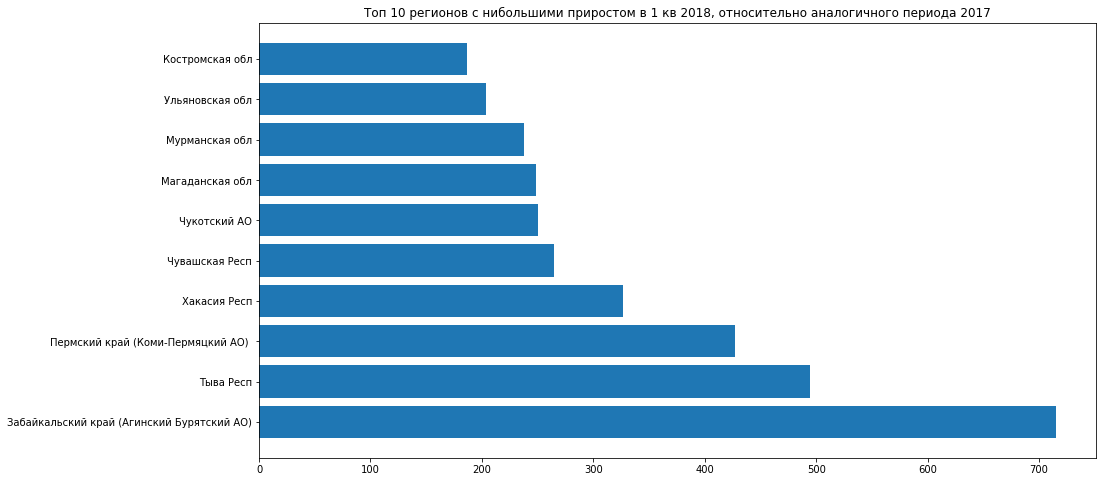

In [122]:
acronia_top_q1 = acronia_2018.sort_values(by = 'percent_diff_sales_q1', ascending = False).reset_index(drop=True).loc[:9]
plt.barh(acronia_top_q1['Region'], acronia_top_q1['percent_diff_sales_q1'])
plt.title('Топ 10 регионов с нибольшими приростом в 1 кв 2018, относительно аналогичного периода 2017')
acronia_top_q1

Топ 10 регионов с наибольшими продажами за 2018 1 квартал

,Region,Brand,Sales_2017Q1,Sales_2017Q2,Sales_2018Q1,Sales_2018Q2,percent_diff_sales_q1,percent_diff_sales_q2
0,Москва г,Acronia,597819.6,625042.9,844792.6,794655.5,41.3,27.1
1,Санкт-Петербург,Acronia,208763.6,163745.2,283523.0,211609.1,35.8,29.2
2,Ростовская обл,Acronia,241998.6,220080.0,271258.7,220655.0,12.1,0.3
3,Краснодарский край,Acronia,161008.2,181031.8,252166.5,190180.0,56.6,5.1
4,Свердловская обл,Acronia,185879.0,162891.0,247447.7,169674.9,33.1,4.2
5,Московская обл,Acronia,136598.8,144785.1,246656.4,216433.6,80.6,49.5
6,Нижегородская обл,Acronia,144017.2,119142.5,166801.0,150116.9,15.8,26.0
7,Приморский край,Acronia,80401.8,96953.7,129870.1,87974.7,61.5,-9.3
8,Челябинская обл,Acronia,86030.8,108340.1,129134.6,98909.9,50.1,-8.7
9,Воронежская обл,Acronia,120164.1,96608.8,124065.4,91101.5,3.2,-5.7


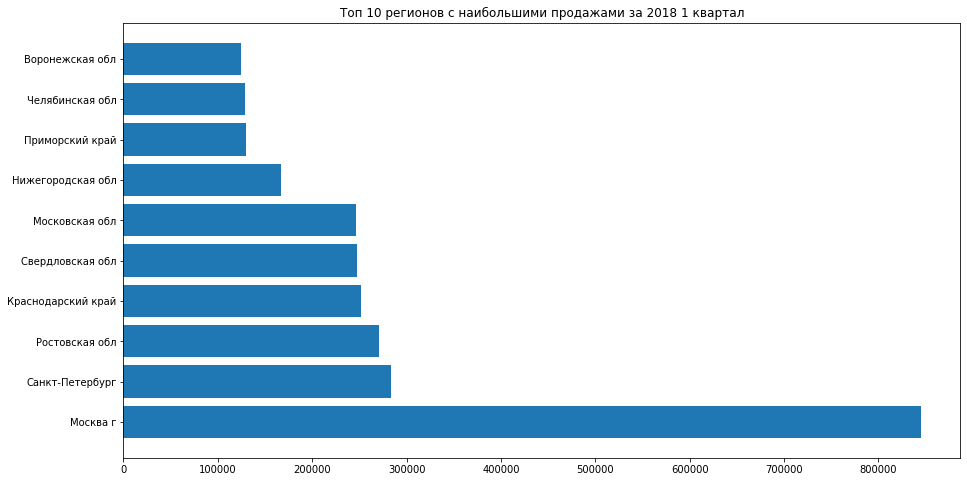

In [123]:
acronia_top_qs1 = acronia_2018.sort_values(by = 'Sales_2018Q1', ascending = False).reset_index(drop=True).loc[:9]
plt.barh(acronia_top_qs1['Region'], acronia_top_qs1['Sales_2018Q1'])
plt.title('Топ 10 регионов с наибольшими продажами за 2018 1 квартал')
acronia_top_qs1

Регионы с наименьшим значением роста продаж во первом кв 2018 относительно аналогичного перода 2017

,Region,Brand,Sales_2017Q1,Sales_2017Q2,Sales_2018Q1,Sales_2018Q2,percent_diff_sales_q1,percent_diff_sales_q2
68,Забайкальский край,Acronia,9284.6,9071.4,12058.1,10793.8,29.9,19.0
69,Красноярский край,Acronia,87102.2,87338.5,112662.2,110881.1,29.3,27.0
70,Саха (Якутия) Респ,Acronia,6878.6,10009.9,8854.0,9398.8,28.7,-6.1
71,Ивановская обл,Acronia,11733.0,10368.1,15091.4,11220.0,28.6,8.2
72,Пензенская обл,Acronia,11367.5,21281.8,14109.0,18610.6,24.1,-12.6
73,Смоленская обл,Acronia,21131.8,17679.2,25960.0,20446.5,22.8,15.7
74,Татарстан Респ,Acronia,66311.4,69167.3,81360.1,49776.2,22.7,-28.0
75,Иркутская обл,Acronia,90133.3,86374.4,107537.6,83333.0,19.3,-3.5
76,Нижегородская обл,Acronia,144017.2,119142.5,166801.0,150116.9,15.8,26.0
77,Волгоградская обл,Acronia,37623.3,27030.8,43322.9,51789.1,15.1,91.6


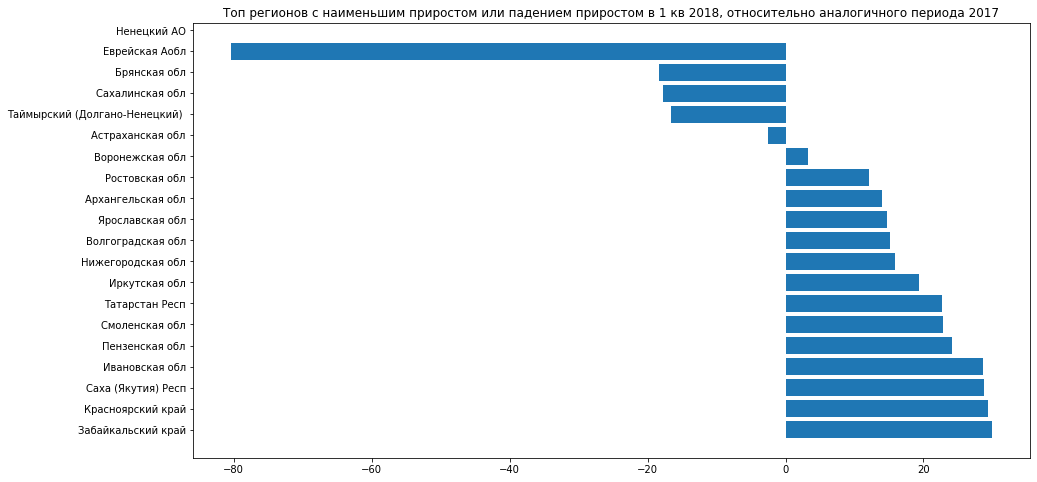

In [124]:
acronia_antitop_q1 = acronia_2018.sort_values(by = 'percent_diff_sales_q1', ascending = False).reset_index(drop=True).tail(20)
plt.barh(acronia_antitop_q1['Region'], acronia_antitop_q1['percent_diff_sales_q1'])
plt.title('Топ регионов с наименьшим приростом или падением приростом в 1 кв 2018, относительно аналогичного периода 2017')
acronia_antitop_q1

### Terralex

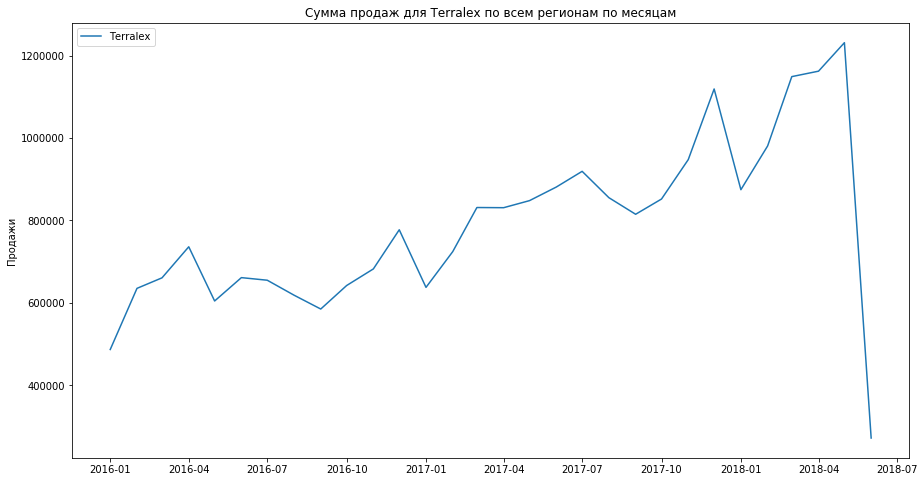

In [125]:
ter = df.query('Brand == "Terralex"').reset_index(drop=True)
df_piv = ter.pivot_table(index=['date'], columns='Brand', values='Sales', aggfunc='sum')


plt.plot(df_piv)
plt.legend(df_piv.columns, loc='upper left')
plt.title('Сумма продаж для Terralex по всем регионам по месяцам')
plt.ylabel('Мес.')
plt.ylabel('Продажи')
plt.show()

#### Продажи в 2016/2017 гг

Посмотрю для бренда Terralex по всем полям: 
- количество записей
- среднее
- стандартное отклонение
- минимум
- 0.25 квантиль (граница нижней четверти значений)
- 0.5 квантиль (медиана)
- 0.75 квантиль (граница отделяющая верхнюю четверть значений)
- максимум


In [126]:
terralex = year_tab.query('Brand == "Terralex"').reset_index(drop=True)

terralex.describe()

,Sales_2016,Sales_2017,sales_per_popul,percent_diff_sales_2016_2017,abs_diff_sales_2016_2017
count,81.000000,8.800000e+01,88.000000,81.000000,81.000000
mean,95620.728395,1.166214e+05,5436.032955,44.030864,31022.985185
std,137939.909577,1.717207e+05,4050.728251,37.869914,39589.185181
min,228.800000,1.480000e+01,75.100000,-36.300000,-8865.300000
25%,20673.000000,1.704428e+04,2281.200000,26.400000,6071.700000
50%,43487.900000,4.588180e+04,4835.900000,37.800000,14893.300000
75%,108211.700000,1.389014e+05,7689.425000,49.600000,43146.000000
max,835743.600000,1.030729e+06,17477.900000,289.200000,194985.200000


В 2017 году в среднем продажи выросли относительно 2016 на 44% (38% медиана). 

Закрашу фон ячеек с показателями лучшей(более 0.75 квантиля) и худшей(менее 0.25 квантиля) динамики по полю с процентным отношением продаж 2016/2017 'percent_diff_sal_2016_2017', суммой продаж за 2017 . Зеленый - лучшие, розовый - худшие.
По такой же логике окрашу топ и антитоп по количеству продаж на 100 тыс. населения в регионе поле - 'sales_per_popul'.

In [159]:
green = []
red = []

get_colors_3(year_tab, 'Sales_2017', 'sales_per_popul', 'percent_diff_sales_2016_2017')
terralex_styler = terralex.style.applymap(coloring, subset=['Sales_2017', 'sales_per_popul', 'percent_diff_sales_2016_2017'])

![TerralexYear](https://github.com/olga-abrams/DS_projects/blob/main/pharm/img/TerralexYear.png)

In [128]:
with pd.ExcelWriter(excel_file, engine=engine, mode='a') as writer: 
    terralex_styler.to_excel(writer, sheet_name="Terralex Year")

##### Топ регионов по продажами Terralex на 100 тыс. населения

10 регионов с наибольшими продажами в расчете на 100 тыс населения:

,Region,Brand,Sales_2016,Sales_2017,sales_per_popul,percent_diff_sales_2016_2017,abs_diff_sales_2016_2017
0,Удмуртская Респ,Terralex,238455.1,264447.7,17477.9,10.9,25992.6
1,Тульская обл,Terralex,173730.6,227871.2,15274.4,31.2,54140.6
2,Санкт-Петербург,Terralex,628689.1,815462.5,15236.8,29.7,186773.4
3,Волгоградская обл,Terralex,308010.5,358806.1,14231.1,16.5,50795.6
4,Рязанская обл,Terralex,132359.9,153234.6,13663.7,15.8,20874.7
5,Челябинская обл,Terralex,363226.4,458555.5,13127.7,26.2,95329.1
6,Приморский край,Terralex,177197.8,237331.0,12406.0,33.9,60133.2
7,Нижегородская обл,Terralex,266241.8,377672.7,11675.5,41.9,111430.9
8,Ростовская обл,Terralex,362453.5,483136.9,11447.5,33.3,120683.4
9,Алтайский край,Terralex,179359.7,258016.5,10979.1,43.9,78656.8


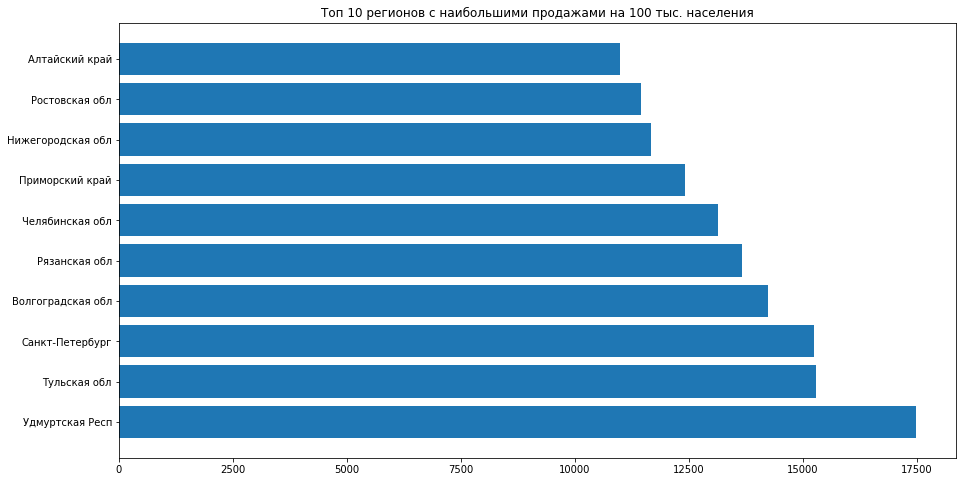

In [129]:
terralex_top = terralex.sort_values(by = 'sales_per_popul', ascending = False).reset_index(drop=True).loc[:9]
plt.rcParams["figure.figsize"] = (15,8)
plt.barh(terralex_top['Region'], terralex_top['sales_per_popul'])
plt.title('Топ 10 регионов с наибольшими продажами на 100 тыс. населения')
terralex_top

20 регионов с наименьшими продажами в расчете на 100 тыс населения:

In [130]:
terralex_antitop = terralex.sort_values(by = 'sales_per_popul', ascending = False).reset_index(drop=True).tail(20)
terralex_antitop

,Region,Brand,Sales_2016,Sales_2017,sales_per_popul,percent_diff_sales_2016_2017,abs_diff_sales_2016_2017
68,Смоленская обл,Terralex,12856.2,18616.8,1961.0,44.8,5760.6
69,Иркутская обл (Усть-Ордынский Бурятский АО),Terralex,NaN,2615.2,1947.0,NaN,NaN
70,Дагестан Респ,Terralex,32444.0,43076.4,1405.9,32.8,10632.4
71,Карачаево-Черкесская Респ,Terralex,6769.2,6359.1,1363.7,-6.1,-410.1
72,Ингушетия Респ,Terralex,4559.0,6564.6,1345.1,44.0,2005.6
73,Камчатский край,Terralex,2059.4,3951.5,1252.2,91.9,1892.1
74,Курганская обл,Terralex,6226.4,10434.1,1234.0,67.6,4207.7
75,Коми Респ,Terralex,8194.8,10138.8,1205.7,23.7,1944.0
76,Башкортостан Респ,Terralex,35504.9,48687.2,1198.2,37.1,13182.3
77,Чукотский АО,Terralex,228.8,451.9,915.7,97.5,223.1


В антитоп регионов по продажам на душу населения попали в том числе такие крупные регионы, как Смоленская обл, Башкортостан, Дагестан, Чеченская республика. Население всех этих субьектов РФ более миллиона человек.

##### Топ по процентному отношению продаж 2017 года к 2016

,Region,Brand,Sales_2016,Sales_2017,sales_per_popul,percent_diff_sales_2016_2017,abs_diff_sales_2016_2017
0,Еврейская Аобл,Terralex,961.6,3742.6,2310.0,289.2,2781.0
1,Чеченская Респ,Terralex,1785.3,4347.8,302.6,143.5,2562.5
2,Псковская обл,Terralex,8251.8,17544.5,2756.2,112.6,9292.7
3,Чукотский АО,Terralex,228.8,451.9,915.7,97.5,223.1
4,Калининградская обл,Terralex,16137.8,31092.8,3126.2,92.7,14955.0
5,Камчатский край,Terralex,2059.4,3951.5,1252.2,91.9,1892.1
6,Кемеровская обл,Terralex,78826.0,142453.7,5286.1,80.7,63627.7
7,Саха (Якутия) Респ,Terralex,1763.9,3156.3,327.3,78.9,1392.4
8,Новгородская обл,Terralex,24395.5,42543.8,7014.9,74.4,18148.3
9,Новосибирская обл,Terralex,108211.7,187795.7,6733.8,73.5,79584.0


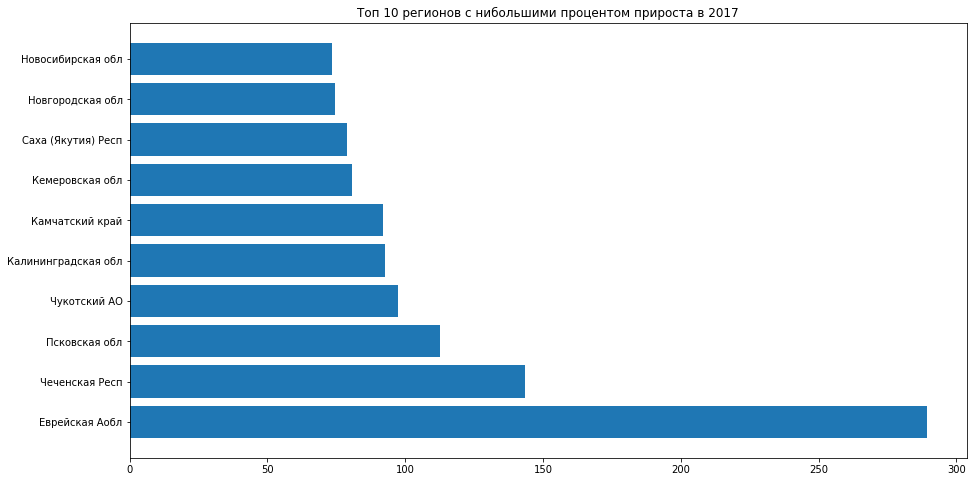

In [131]:
terralex_top1 = terralex.sort_values(by = 'percent_diff_sales_2016_2017', ascending = False).reset_index(drop=True).loc[:9]
plt.barh(terralex_top1['Region'], terralex_top1['percent_diff_sales_2016_2017'])
plt.title('Топ 10 регионов с нибольшими процентом прироста в 2017')
terralex_top1

Регионы с самым низким процентом прироста продаж в 2017г, а так же регионы данные о продажах в 2016 отсутвуют:

In [132]:
terralex_antitop1 = terralex.sort_values(by = 'percent_diff_sales_2016_2017', ascending = False).reset_index(drop=True).tail(20)
terralex_antitop1

,Region,Brand,Sales_2016,Sales_2017,sales_per_popul,percent_diff_sales_2016_2017,abs_diff_sales_2016_2017
68,Кабардино-Балкарская Респ,Terralex,23872.2,28844.1,3331.4,20.8,4971.9
69,Воронежская обл,Terralex,141832.0,169362.4,7257.0,19.4,27530.4
70,Тверская обл,Terralex,32467.1,38555.2,3003.0,18.8,6088.1
71,Волгоградская обл,Terralex,308010.5,358806.1,14231.1,16.5,50795.6
72,Рязанская обл,Terralex,132359.9,153234.6,13663.7,15.8,20874.7
73,Архангельская обл,Terralex,74363.9,84005.7,7273.1,13.0,9641.8
74,Владимирская обл,Terralex,64941.7,73006.4,5296.7,12.4,8064.7
75,Удмуртская Респ,Terralex,238455.1,264447.7,17477.9,10.9,25992.6
76,Брянская обл,Terralex,78604.9,86746.8,7163.3,10.4,8141.9
77,Астраханская обл,Terralex,59091.9,62403.2,6132.9,5.6,3311.3


##### Топ по абсолютным цифрам продаж 2017 год

,Region,Brand,Sales_2016,Sales_2017,sales_per_popul,percent_diff_sales_2016_2017,abs_diff_sales_2016_2017
0,Москва г,Terralex,835743.6,1030728.8,8241.6,23.3,194985.2
1,Санкт-Петербург,Terralex,628689.1,815462.5,15236.8,29.7,186773.4
2,Краснодарский край,Terralex,383995.0,506764.6,9043.8,32.0,122769.6
3,Ростовская обл,Terralex,362453.5,483136.9,11447.5,33.3,120683.4
4,Челябинская обл,Terralex,363226.4,458555.5,13127.7,26.2,95329.1
5,Московская обл,Terralex,297257.6,390308.9,5201.8,31.3,93051.3
6,Нижегородская обл,Terralex,266241.8,377672.7,11675.5,41.9,111430.9
7,Волгоградская обл,Terralex,308010.5,358806.1,14231.1,16.5,50795.6
8,Свердловская обл,Terralex,244469.6,338117.4,7817.3,38.3,93647.8
9,Удмуртская Респ,Terralex,238455.1,264447.7,17477.9,10.9,25992.6


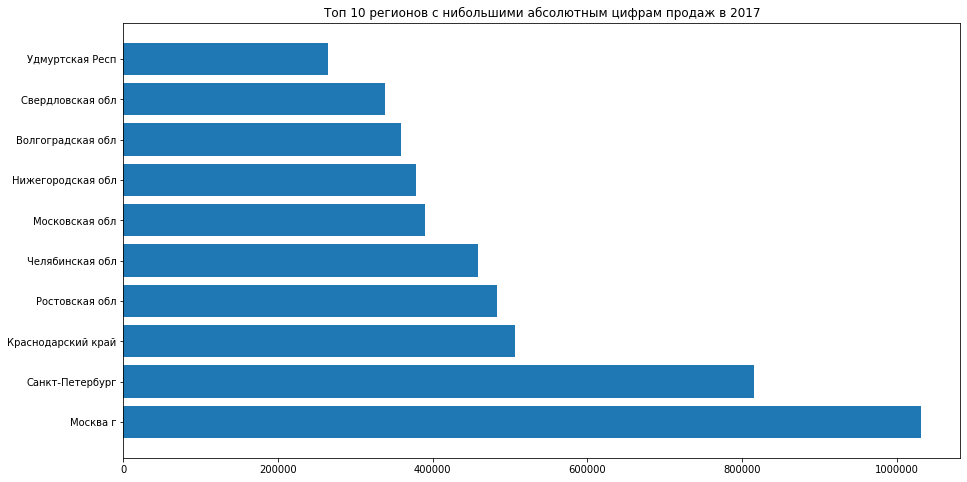

In [133]:
terralex_top2 = terralex.sort_values(by = 'Sales_2017', ascending = False).reset_index(drop=True).loc[:9]
plt.barh(terralex_top2['Region'], terralex_top2['Sales_2017'])
plt.title('Топ 10 регионов с нибольшими абсолютным цифрам продаж в 2017')
terralex_top2

#### Продажи в 1 и 2 кварталах 2018 г для бренда Terralex

In [134]:
terralex_2018 = quarter_tab.query('Brand == "Terralex"').reset_index(drop=True)
terralex_2018.describe()

,Sales_2017Q1,Sales_2017Q2,Sales_2018Q1,Sales_2018Q2,percent_diff_sales_q1,percent_diff_sales_q2
count,86.000000,87.000000,87.000000,88.000000,85.000000,87.000000
mean,25505.268605,29429.416092,34539.212644,30294.585227,66.840000,16.716092
std,36519.482881,43612.248194,49809.179767,47586.366389,135.803742,45.965184
min,11.300000,23.700000,16.900000,4.700000,-39.100000,-80.600000
25%,4015.725000,4319.450000,7962.200000,5423.900000,28.200000,-8.850000
50%,10957.800000,11422.400000,14780.400000,12712.350000,43.000000,7.100000
75%,31134.475000,34529.450000,48502.450000,38898.175000,66.000000,26.650000
max,209085.200000,260705.300000,299146.000000,328254.300000,1205.300000,233.900000


В первом квартале 2018 года продажи показывают значительный рост относительно аналогичного периода 2017 г (медианное значение 67%), во втором квартале рост замедлился (17%). Второй квартал 2018 года показывает отрицательную динамику относительно первого квартала того же года, хотя в отношении того же периода 2017 есть небольшой рост. Данные за последний месяц неполные и это икажает статистику во втором квартале.

Окрашу фон ячеек с показателями лежащими в верхней четверти(более 0.75 квантиля) и нижней четверти(менее 0.25 квантиля) значений

In [160]:
green = []
red = []

get_colors_4(terralex_2018, 'Sales_2018Q2', 'Sales_2018Q1', 'percent_diff_sales_q1', 'percent_diff_sales_q2')
terralex_2018_styler = terralex_2018.style.applymap(coloring, subset=['Sales_2018Q2', 'Sales_2018Q1', 'percent_diff_sales_q1', 'percent_diff_sales_q2'])

![TerralexQuarter](https://github.com/olga-abrams/DS_projects/blob/main/pharm/img/TerralexQuarter.png)

In [136]:
with pd.ExcelWriter(excel_file, engine=engine, mode='a') as writer: 
    terralex_2018_styler.to_excel(writer, sheet_name="Terralex Quarter")

,Region,Brand,Sales_2017Q1,Sales_2017Q2,Sales_2018Q1,Sales_2018Q2,percent_diff_sales_q1,percent_diff_sales_q2
0,Ненецкий АО,Terralex,11.3,45.0,147.5,86.9,1205.3,93.1
1,Еврейская Аобл,Terralex,381.7,736.9,1589.4,1390.8,316.4,88.7
2,Таймырский (Долгано-Ненецкий),Terralex,18.6,30.2,65.0,36.9,249.5,22.2
3,Калмыкия Респ,Terralex,3514.5,2540.6,10177.1,4045.2,189.6,59.2
4,Ямало-Ненецкий АО,Terralex,3661.9,2741.7,8495.4,5443.3,132.0,98.5
5,Хакасия Респ,Terralex,2021.0,2649.1,4687.2,3743.9,131.9,41.3
6,Камчатский край,Terralex,504.6,1226.4,1170.3,795.3,131.9,-35.2
7,Мордовия Респ,Terralex,4753.9,5881.8,10665.0,6805.0,124.3,15.7
8,Псковская обл,Terralex,3070.3,4028.2,6604.7,5447.2,115.1,35.2
9,Омская обл,Terralex,25680.3,34924.0,55059.1,38918.8,114.4,11.4


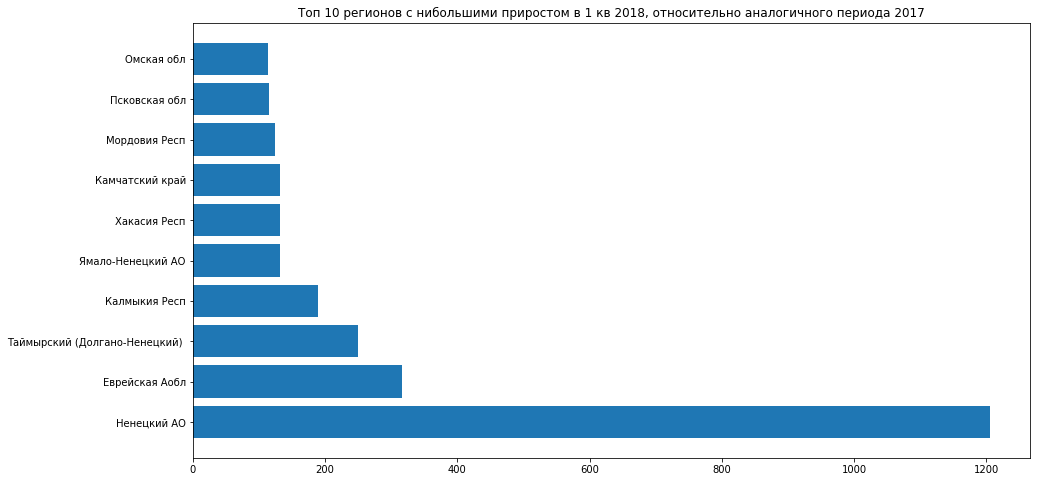

In [137]:
terralex_top_q1 = terralex_2018.sort_values(by = 'percent_diff_sales_q1', ascending = False).reset_index(drop=True).loc[:9]
plt.barh(terralex_top_q1['Region'], terralex_top_q1['percent_diff_sales_q1'])
plt.title('Топ 10 регионов с нибольшими приростом в 1 кв 2018, относительно аналогичного периода 2017')
terralex_top_q1

Регионы с худшим приростом или падением продаж в  в 1 кв 2018, относительно аналогичного периода 2017

,Region,Brand,Sales_2017Q1,Sales_2017Q2,Sales_2018Q1,Sales_2018Q2,percent_diff_sales_q1,percent_diff_sales_q2
0,Москва г,Terralex,209085.2,260705.3,299146.0,328254.3,43.1,25.9
1,Санкт-Петербург,Terralex,181285.7,199253.0,254396.6,200384.2,40.3,0.6
2,Ростовская обл,Terralex,101067.8,132388.7,138642.7,118195.1,37.2,-10.7
3,Краснодарский край,Terralex,97473.5,134237.6,131357.7,119708.6,34.8,-10.8
4,Нижегородская обл,Terralex,89365.8,86534.6,121521.0,97065.3,36.0,12.2
5,Московская обл,Terralex,80585.8,98042.1,113072.8,124937.6,40.3,27.4
6,Челябинская обл,Terralex,94058.6,111341.4,110131.9,93030.7,17.1,-16.4
7,Волгоградская обл,Terralex,77001.5,98052.9,98400.7,107437.8,27.8,9.6
8,Свердловская обл,Terralex,72009.7,80741.0,93867.6,76500.1,30.4,-5.3
9,Алтайский край,Terralex,59770.8,60550.1,72121.5,56385.5,20.7,-6.9


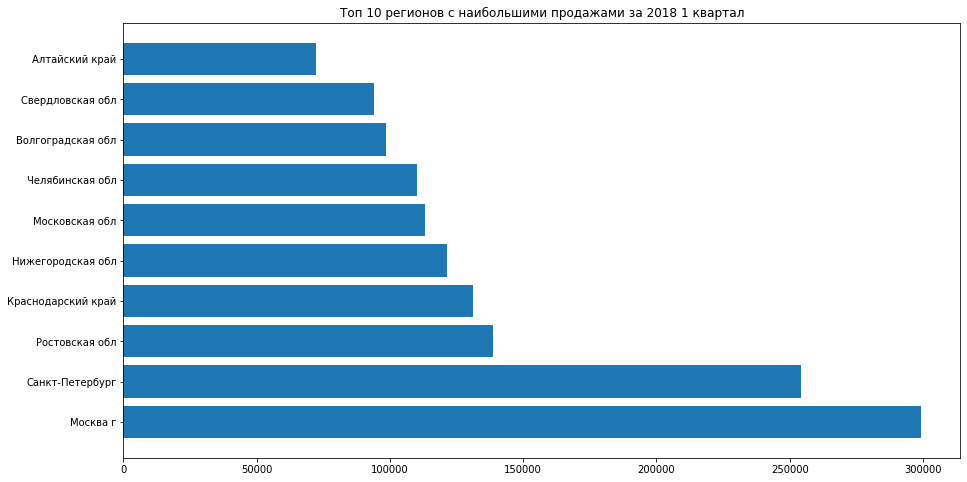

In [138]:
terralex_top_qs1 = terralex_2018.sort_values(by = 'Sales_2018Q1', ascending = False).reset_index(drop=True).loc[:9]
plt.barh(terralex_top_qs1['Region'], terralex_top_qs1['Sales_2018Q1'])
plt.title('Топ 10 регионов с наибольшими продажами за 2018 1 квартал')
terralex_top_qs1

Регионы с наиболее сильным падением во втором кв 2018 относительно аналогичного перода 2017

,Region,Brand,Sales_2017Q1,Sales_2017Q2,Sales_2018Q1,Sales_2018Q2,percent_diff_sales_q1,percent_diff_sales_q2
68,Алтайский край,Terralex,59770.8,60550.1,72121.5,56385.5,20.7,-6.9
69,Ханты-Мансийский АО,Terralex,10351.6,13662.5,12305.8,11762.3,18.9,-13.9
70,Амурская обл,Terralex,7193.9,6379.1,8542.8,5365.7,18.8,-15.9
71,Челябинская обл,Terralex,94058.6,111341.4,110131.9,93030.7,17.1,-16.4
72,Коми Респ,Terralex,2685.3,2566.3,3088.6,2451.3,15.0,-4.5
73,Бурятия Респ,Terralex,7506.5,7998.3,8564.1,6635.7,14.1,-17.0
74,Чеченская Респ,Terralex,1042.3,814.8,1105.9,1477.4,6.1,81.3
75,Тамбовская обл,Terralex,9292.4,8572.6,9853.5,8864.8,6.0,3.4
76,Воронежская обл,Terralex,36820.9,41931.0,36728.0,38795.2,-0.3,-7.5
77,Астраханская обл,Terralex,14904.2,16204.8,14780.4,14609.0,-0.8,-9.8


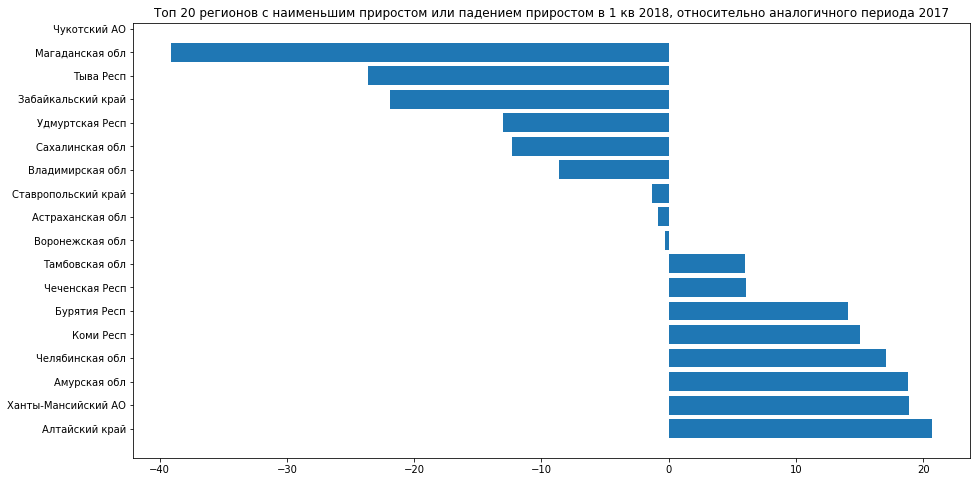

In [139]:
terralex_antitop_q1 = terralex_2018.sort_values(by = 'percent_diff_sales_q1', ascending = False).reset_index(drop=True).tail(20)
plt.barh(terralex_antitop_q1['Region'], terralex_antitop_q1['percent_diff_sales_q1'])
plt.title('Топ 20 регионов с наименьшим приростом или падением приростом в 1 кв 2018, относительно аналогичного периода 2017')
terralex_antitop_q1

### Simplonia

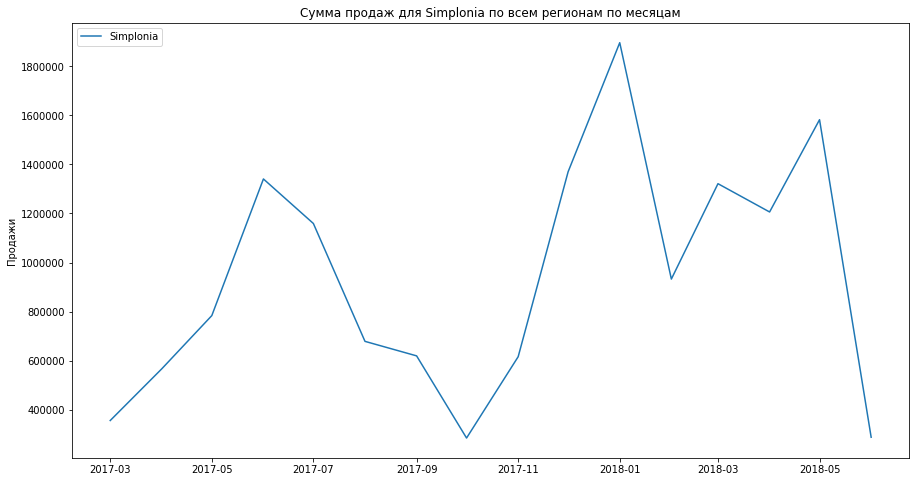

In [140]:
simplonia = df.query('Brand == "Simplonia"').reset_index(drop=True)
df_piv = simplonia.pivot_table(index=['date'], columns='Brand', values='Sales', aggfunc='sum')


plt.plot(df_piv)
plt.legend(df_piv.columns, loc='upper left')
plt.title('Сумма продаж для Simplonia по всем регионам по месяцам')
plt.ylabel('Мес.')
plt.ylabel('Продажи')
plt.show()

Началом периода данных о Simplonia является март 2017 г. На графике видно резкое снижение осенью 2017. Данные по последнему месяцу скорее всего неполные. В целом тренд выглядит положительным. Анализ по годовым продажам невозможно сделать в связи с коротким промежутком времени в данных. 

In [141]:
simplonia_quart = quarter_tab.query('Brand == "Simplonia"')

In [142]:
simplonia_quart.describe()

,Sales_2017Q1,Sales_2017Q2,Sales_2018Q1,Sales_2018Q2,percent_diff_sales_q1,percent_diff_sales_q2
count,17.000000,51.000000,71.000000,74.000000,17.000000,50.00000
mean,20938.676471,52770.078431,58449.153521,41568.433784,2940.923529,6664.20000
std,29340.283058,100547.840634,120612.872558,89012.544544,8308.081478,21211.34782
min,117.800000,23.600000,23.600000,23.600000,-99.800000,-99.90000
25%,1808.700000,619.550000,1261.850000,526.075000,-77.800000,-71.77500
50%,13682.900000,5459.500000,17756.700000,5592.600000,121.300000,41.75000
75%,20568.800000,66490.450000,52789.550000,41784.250000,1461.000000,453.55000
max,113881.300000,466741.800000,812064.100000,543602.500000,34385.500000,116172.40000


Создам сводную таблицу по продажам Simplonia по 1 кварталу 2018 года

In [143]:
simplonia_quart = simplonia_quart.drop(['Sales_2017Q1', 'Sales_2017Q2', 'Sales_2018Q2', 'percent_diff_sales_q1', 'percent_diff_sales_q2'], axis=1)

Добавлю столбец 'sales_per_popul' с продажами на 100 тыс. населения

In [144]:
simplonia_quart = simplonia_quart.apply(population_of_regions, axis=1)
simplonia_quart['sales_per_popul'] =  round(simplonia_quart['Sales_2018Q1'] * 10**5 / simplonia_quart['population'],1)
simplonia_quart = simplonia_quart.drop(['population'], axis=1)
simplonia_quart

,Region,Brand,Sales_2018Q1,sales_per_popul
9,Архангельская обл,Simplonia,117493.5,10172.4
18,Брянская обл,Simplonia,50.4,4.2
23,Владимирская обл,Simplonia,78405.8,5688.4
28,Вологодская обл,Simplonia,946.6,80.4
54,Калужская обл,Simplonia,745.0,73.6
...,...,...,...,...
251,Калининградская обл,Simplonia,NaN,NaN
252,Карачаево-Черкесская Респ,Simplonia,NaN,NaN
253,Костромская обл,Simplonia,NaN,NaN
254,Курганская обл,Simplonia,NaN,NaN


Изменю фон ячеек четветь высоких показателей окрашу зеленым, низких розовым.

In [161]:
green = []
red = []
get_colors_2(simplonia_quart, 'Sales_2018Q1', 'sales_per_popul')
simplonia_styler = simplonia_quart.style.applymap(coloring, subset=['Sales_2018Q1', 'sales_per_popul'])

![Simplonia](https://github.com/olga-abrams/DS_projects/blob/main/pharm/img/Simplonia.png)

In [146]:
with pd.ExcelWriter(excel_file, engine=engine, mode='a') as writer: 
    simplonia_styler.to_excel(writer, sheet_name="Simplonia")

Топ 10 регионов по продажам Simplonia на 100 тысяч душ населения

,Region,Brand,Sales_2018Q1,sales_per_popul
0,Липецкая обл,Simplonia,280224.5,24363.1
1,Томская обл,Simplonia,207884.0,19279.2
2,Красноярский край,Simplonia,429352.3,14926.2
3,Алтайский край,Simplonia,276074.9,11747.5
4,Архангельская обл,Simplonia,117493.5,10172.4
5,Новосибирская обл,Simplonia,259971.8,9321.8
6,Сахалинская обл,Simplonia,36057.4,7355.9
7,Еврейская Аобл,Simplonia,11439.9,7061.1
8,Москва г,Simplonia,812064.1,6493.2
9,Владимирская обл,Simplonia,78405.8,5688.4


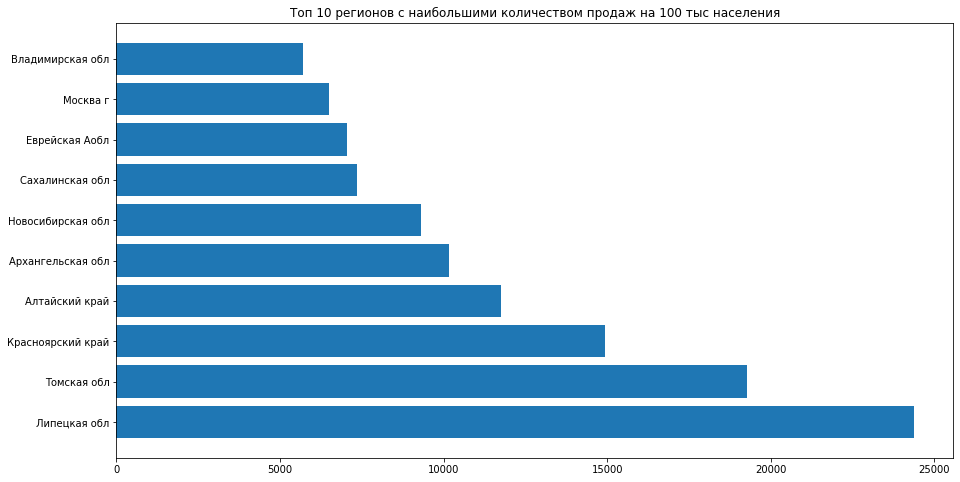

In [147]:
simplonia_quart_top = simplonia_quart.sort_values(by = 'sales_per_popul', ascending = False).reset_index(drop=True).loc[:9]
plt.barh(simplonia_quart_top['Region'], simplonia_quart_top['sales_per_popul'])
plt.title('Топ 10 регионов с наибольшими количеством продаж на 100 тыс населения')
simplonia_quart_top

,Region,Brand,Sales_2018Q1,sales_per_popul
0,Москва г,Simplonia,812064.1,6493.2
1,Красноярский край,Simplonia,429352.3,14926.2
2,Липецкая обл,Simplonia,280224.5,24363.1
3,Алтайский край,Simplonia,276074.9,11747.5
4,Новосибирская обл,Simplonia,259971.8,9321.8
5,Томская обл,Simplonia,207884.0,19279.2
6,Санкт-Петербург,Simplonia,143698.1,2685.0
7,Башкортостан Респ,Simplonia,136373.4,3356.2
8,Свердловская обл,Simplonia,127558.9,2949.2
9,Татарстан Респ,Simplonia,118975.4,3055.1


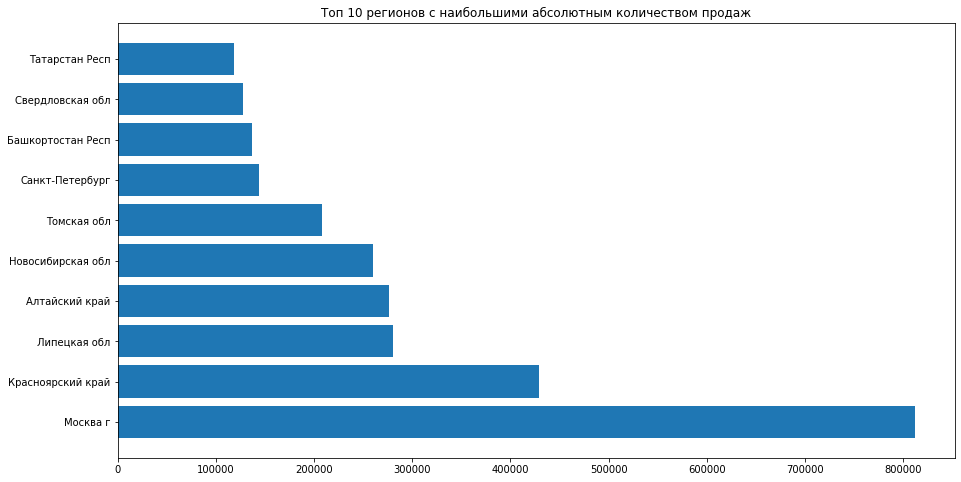

In [148]:
simplonia_quart_top = simplonia_quart.sort_values(by = 'Sales_2018Q1', ascending = False).reset_index(drop=True).loc[:9]
plt.barh(simplonia_quart_top['Region'], simplonia_quart_top['Sales_2018Q1'])
plt.title('Топ 10 регионов с наибольшими абсолютным количеством продаж')
simplonia_quart_top

## Вывод

Переработка данных.

В ходе анализа данных в исходные данные были добавлена численность регионов РФ, для последующего расчета количества продаж на 100.000 населения. Этот показатель был необходим для сравнения уровня продаж различных регионов.

Добавлен столбец с датой в формате datetime для последующей работы с временными рядами. 

Анализ данных.

Проанализированы временные отрезки, за которые в таблице есть сведения о продажах. Для продаж Acronia и Terralex это 2016, 2017 и первые 6 месяцев 2018 года. Данные о продажах Simplonia начинаются с марта 2017 года, количество записей увеличивается в течение нескольких месяцев. 

Судя по графику суммарных продаж для каждого бренда по месяцам, последний месяц, июнь 2018, содержит неполные данные, что может исказить анализ за 2-й квартал 2018.

Графики всех трех брендов имеют положительную динамику. Продажи Simplonia показывают значительный рост в первой половине 2017 и резкое падение осенью того же года, пик которого приходится на октябрь, с последующим восстановлением и ростом продаж.

По брендам Acronia и Terralex проведен сравнительный анализ за 2016 и 2017 годы, а также сравнительный анализ 1 квартала 2018 года как наиболее актуального периода с полными данными, с аналогичным периодом 2018 года. 
Выявлены регионы с наиболее высокими абсолютными продажами, продажами в расчете на плотность населения региона, показателями роста относительно аналогичного периода

По бренду Simplonia проведен анализ по 1 кварталу 2018 года по абсолютным продажам и продажам на душу населения, выведен график суммарных продаж по месяцам.

Соответствующие графики и таблицы представлены в проекте.

